### Libraries

We will use many functions from the base package, which is loaded by default, but also some functions from time series libraries. What makes the R programming language so great is its vast contributed packages libraries. An exhaustive list of these can be found at https://cran.r-project.org/web/views/TimeSeries.html. Let’s install some of these.

In [2]:
# Most common time series libraries
install.packages(c("dlm", "forecast", "lubridate", "tsa", "tseries", "xts", "zoo"), dependencies = TRUE)

# Datasets
install.packages(c("expsmooth", "fpp", "TSA", "astsa"))

# Hadley Wickham's tidyverse universe
install.packages("tidyverse")

Installing packages into 'C:/Users/emara/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


As a side remark, note that the **tidyverse**, which loads a bundle of packages, overwrites some of the base functions, notably **lag** and **filter** which are present in both **dplyr** and **stats** (one of the default libraries that come alongside with R and is loaded upon start). Load libraries with great caution! In case of ambiguity (when many functions in different packages have the same name), use the **::** operator to specify the package, e.g. **stat::lag**. You can unload a library using the command

`detach("package:tidyverse", unload = TRUE)`

### Time series objects and basic plots

Objects in **R** are vectors by default, which have a type and attributes (vector is a type, `length` is an attribute of vectors). Some objects also inherit a class, such as `ts`. They inherit printing and plotting methods specific to the data class.

We start by loading the `AirPassengers` dataset, which contains monthly airline passenger numbers for years 1949-1960. Datasets that are found in libraries other than `datasets` must typically be loaded via a call to `data`, unless they are lazy loaded when calling the library. Both datasets are time series.

In [3]:
# AirPassenger dataset, lazy-loaded
class(AirPassengers)  #object of class 'ts'

[1] "ts"

In [4]:
# Run this to get a description of the dataset
`?`(AirPassengers)

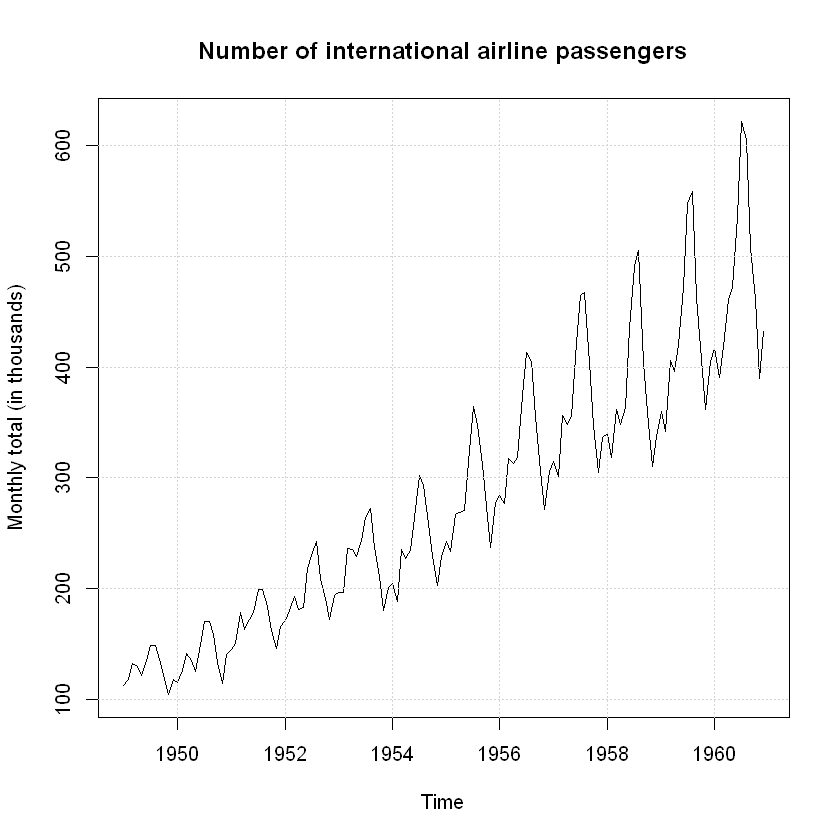

In [5]:
# Basic plot
plot(AirPassengers, ylab = "Monthly total (in thousands)", main = "Number of international airline passengers")
grid()

In [6]:
`?`(sunspot.month)

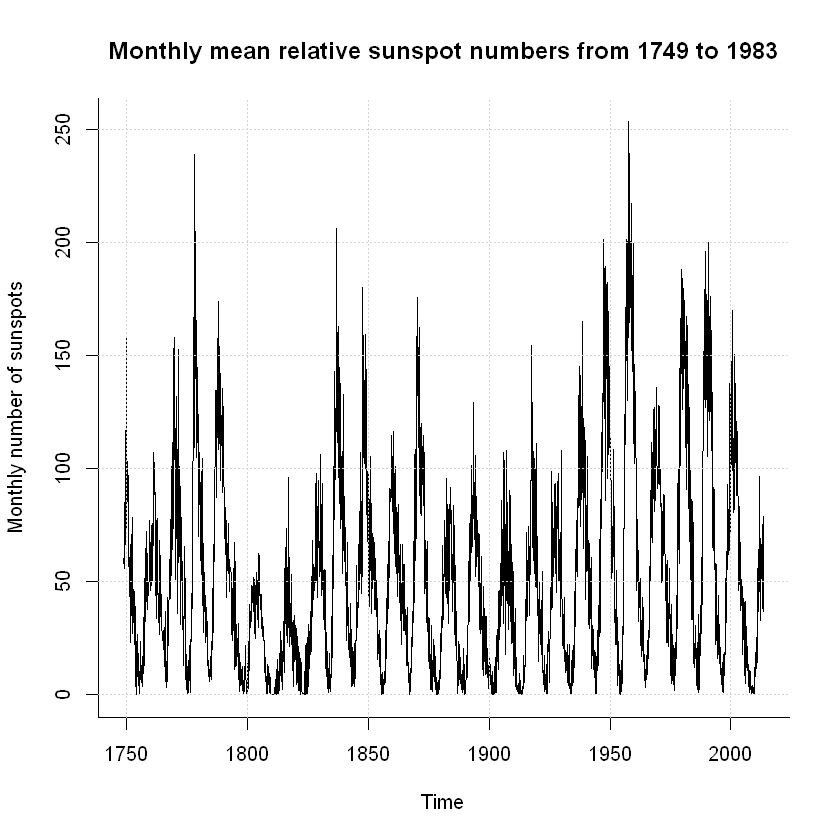

In [7]:
plot(sunspot.month, ylab = "Monthly number of sunspots", main = "Monthly mean relative sunspot numbers from 1749 to 1983", bty = "l")
grid()

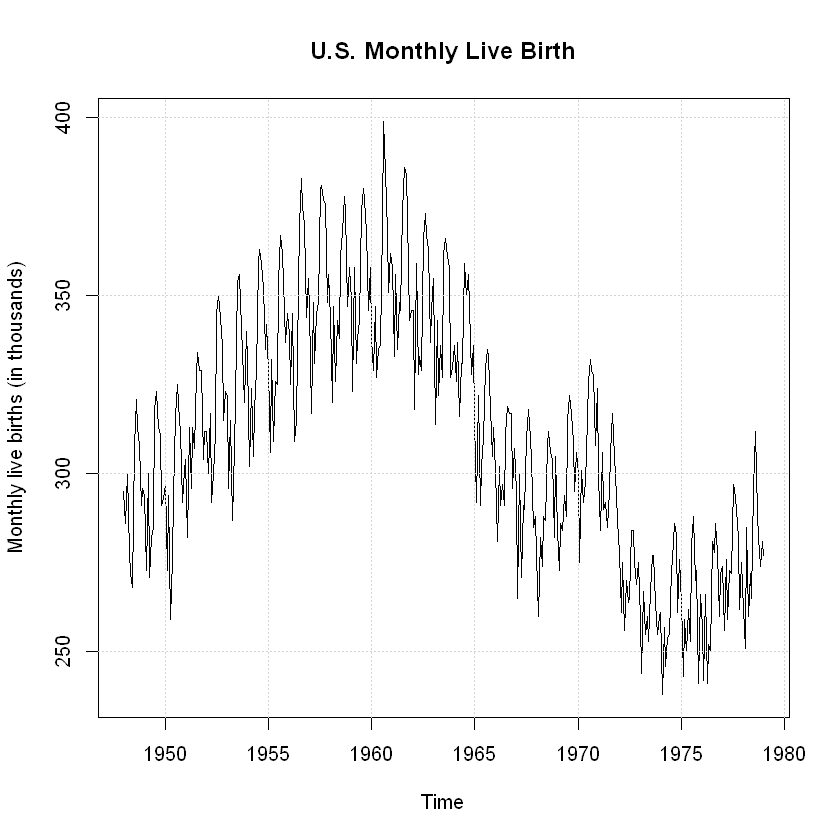

In [8]:
# Dataset present in a R package - without loading the package
data(list = "birth", package = "astsa")
plot(birth, ylab = "Monthly live births (in thousands)", main = "U.S. Monthly Live Birth")
grid()

### Introduction to the basic time series functions

The first example we are going to handle is `lh`, a time series of 48 observations at 10-minute intervals on luteinizing hormone levels for a human female. Start by printing it.

In [9]:
lh

Time Series:
Start = 1 
End = 48 
Frequency = 1 
 [1] 2.4 2.4 2.4 2.2 2.1 1.5 2.3 2.3 2.5 2.0 1.9 1.7 2.2 1.8 3.2 3.2 2.7 2.2 2.2
[20] 1.9 1.9 1.8 2.7 3.0 2.3 2.0 2.0 2.9 2.9 2.7 2.7 2.3 2.6 2.4 1.8 1.7 1.5 1.4
[39] 2.1 3.3 3.5 3.5 3.1 2.6 2.1 3.4 3.0 2.9

Look at the information: `Start = 1`, `End = 48` and `Frequency = 1`.

The second example, deaths, gives monthly deaths in the UK from a set of common lung diseases for the years 1974 to 1979.

In [10]:
data("deaths", package = "MASS")
deaths

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1974 3035 2552 2704 2554 2014 1655 1721 1524 1596 2074 2199 2512
1975 2933 2889 2938 2497 1870 1726 1607 1545 1396 1787 2076 2837
1976 2787 3891 3179 2011 1636 1580 1489 1300 1356 1653 2013 2823
1977 3102 2294 2385 2444 1748 1554 1498 1361 1346 1564 1640 2293
1978 2815 3137 2679 1969 1870 1633 1529 1366 1357 1570 1535 2491
1979 3084 2605 2573 2143 1693 1504 1461 1354 1333 1492 1781 1915

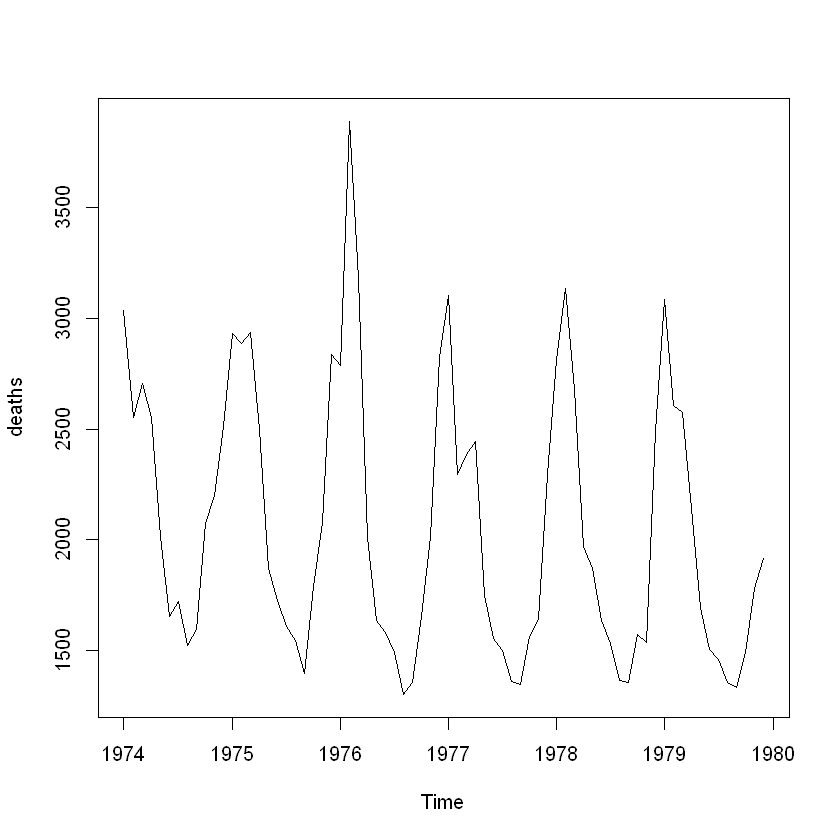

In [11]:
plot(deaths)

In [12]:
tsp(deaths)

[1] 1974.000 1979.917   12.000

In [13]:
start(deaths)

[1] 1974    1

In [14]:
end(deaths)

[1] 1979   12

In [15]:
frequency(deaths)

[1] 12

In [16]:
cycle(deaths)

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1974   1   2   3   4   5   6   7   8   9  10  11  12
1975   1   2   3   4   5   6   7   8   9  10  11  12
1976   1   2   3   4   5   6   7   8   9  10  11  12
1977   1   2   3   4   5   6   7   8   9  10  11  12
1978   1   2   3   4   5   6   7   8   9  10  11  12
1979   1   2   3   4   5   6   7   8   9  10  11  12

Time series can be plotted by `plot`. The argument `lty` of the function  `plot` controls the type of the plotted line (solid, dashed, dotted, …). For more details, type `?par` (for graphical parameters).

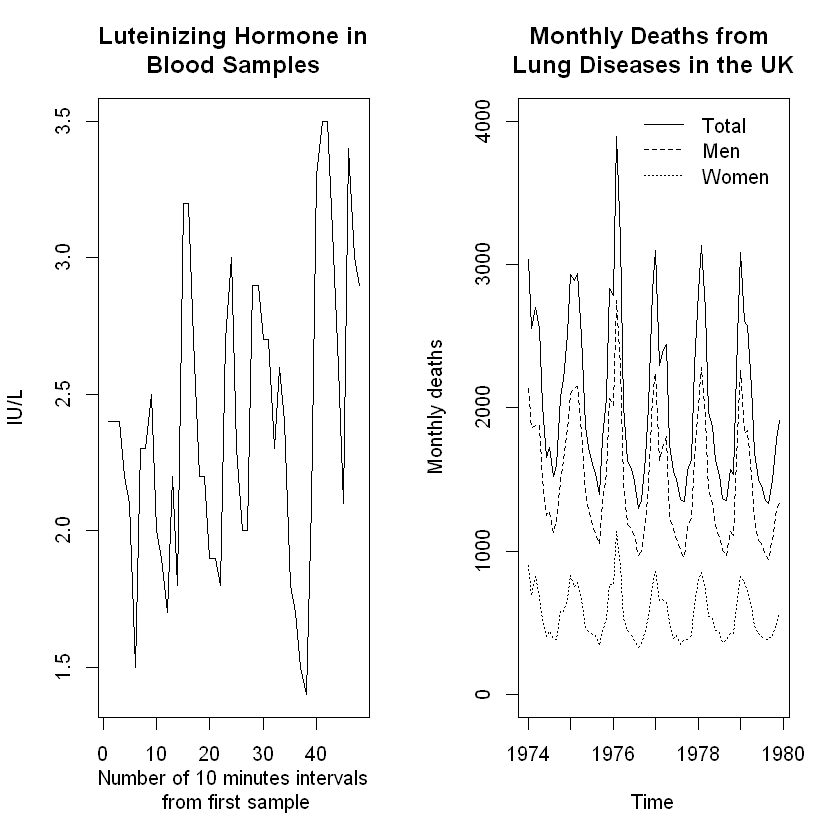

In [17]:
par(mfrow = c(1, 2))  #2 plot side by side

plot(lh, main = "Luteinizing Hormone in\nBlood Samples", ylab = "IU/L", xlab = "Number of 10 minutes intervals\n from first sample")
plot(deaths, main = "Monthly Deaths from \nLung Diseases in the UK", ylab = "Monthly deaths", ylim = c(0, 4000))
lines(mdeaths, lty = 2)
lines(fdeaths, lty = 3)
legend(x = "topright", bty = "n", legend = c("Total", "Men", "Women"), lty = c(1, 2, 3))

Above, you can see plots of `lh` and the three series on deaths. In the right-hand plot, the dashed series is for males, the dotted series for females and the solid line for the total.

The functions `ts.union` and `ts.intersect` bind together multiple time series which have a common frequency. The time axes are aligned and only observations at times that appear in all the series are retained with `ts.intersect`; with `ts.union` the combined series covers the whole range of the components, possibly as `NA` values.

The function `window` extracts a sub-series of a single or multiple time series, by specifying `start`, `end` or both.

The function `lag` shifts the time axis of a series back by **k** positions (default is `k = 1`). Thus  `lag(deaths, k=3)` is the series of deaths shifted one quarter into the past.

In [18]:
mdeaths

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1974 2134 1863 1877 1877 1492 1249 1280 1131 1209 1492 1621 1846
1975 2103 2137 2153 1833 1403 1288 1186 1133 1053 1347 1545 2066
1976 2020 2750 2283 1479 1189 1160 1113  970  999 1208 1467 2059
1977 2240 1634 1722 1801 1246 1162 1087 1013  959 1179 1229 1655
1978 2019 2284 1942 1423 1340 1187 1098 1004  970 1140 1110 1812
1979 2263 1820 1846 1531 1215 1075 1056  975  940 1081 1294 1341

In [19]:
fdeaths

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1974  901  689  827  677  522  406  441  393  387  582  578  666
1975  830  752  785  664  467  438  421  412  343  440  531  771
1976  767 1141  896  532  447  420  376  330  357  445  546  764
1977  862  660  663  643  502  392  411  348  387  385  411  638
1978  796  853  737  546  530  446  431  362  387  430  425  679
1979  821  785  727  612  478  429  405  379  393  411  487  574

In [20]:
window(mdeaths, start = 1974, end = 1975)

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1974 2134 1863 1877 1877 1492 1249 1280 1131 1209 1492 1621 1846
1975 2103                                                       

In [21]:
lag(deaths, k=-1)

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1974      3035 2552 2704 2554 2014 1655 1721 1524 1596 2074 2199
1975 2512 2933 2889 2938 2497 1870 1726 1607 1545 1396 1787 2076
1976 2837 2787 3891 3179 2011 1636 1580 1489 1300 1356 1653 2013
1977 2823 3102 2294 2385 2444 1748 1554 1498 1361 1346 1564 1640
1978 2293 2815 3137 2679 1969 1870 1633 1529 1366 1357 1570 1535
1979 2491 3084 2605 2573 2143 1693 1504 1461 1354 1333 1492 1781
1980 1915                                                       

In [22]:
lag(deaths, k=1)

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1973                                                        3035
1974 2552 2704 2554 2014 1655 1721 1524 1596 2074 2199 2512 2933
1975 2889 2938 2497 1870 1726 1607 1545 1396 1787 2076 2837 2787
1976 3891 3179 2011 1636 1580 1489 1300 1356 1653 2013 2823 3102
1977 2294 2385 2444 1748 1554 1498 1361 1346 1564 1640 2293 2815
1978 3137 2679 1969 1870 1633 1529 1366 1357 1570 1535 2491 3084
1979 2605 2573 2143 1693 1504 1461 1354 1333 1492 1781 1915     

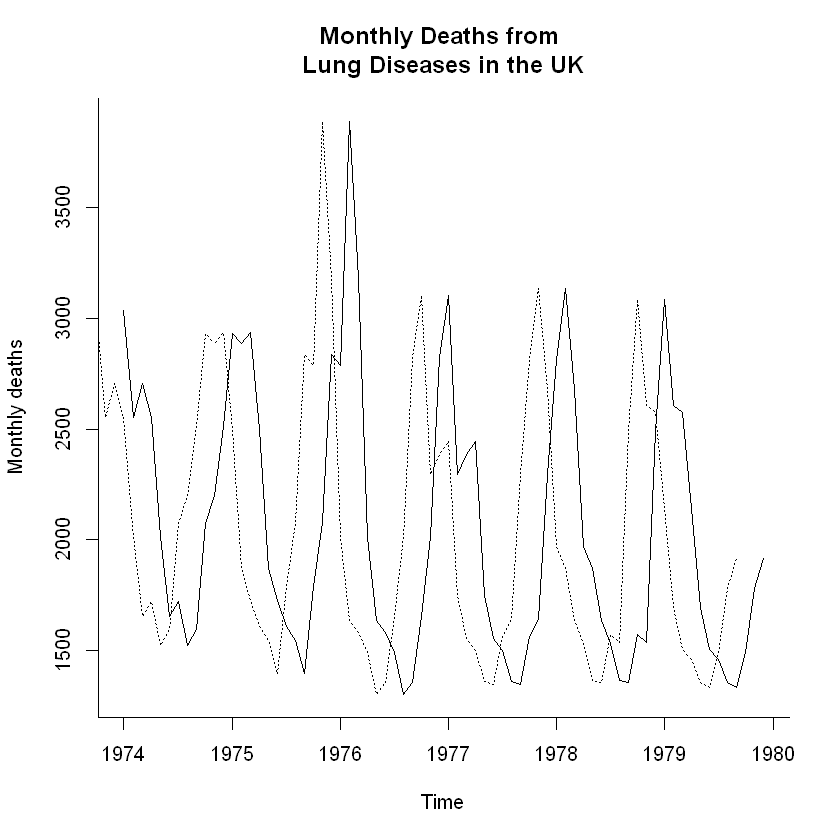

In [25]:
plot(deaths, main = "Monthly Deaths from \nLung Diseases in the UK", ylab = "Monthly deaths", 
    bty = "l")
lines(lag(deaths, k = 3), lty = 3)

In [26]:
deaths

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1974 3035 2552 2704 2554 2014 1655 1721 1524 1596 2074 2199 2512
1975 2933 2889 2938 2497 1870 1726 1607 1545 1396 1787 2076 2837
1976 2787 3891 3179 2011 1636 1580 1489 1300 1356 1653 2013 2823
1977 3102 2294 2385 2444 1748 1554 1498 1361 1346 1564 1640 2293
1978 2815 3137 2679 1969 1870 1633 1529 1366 1357 1570 1535 2491
1979 3084 2605 2573 2143 1693 1504 1461 1354 1333 1492 1781 1915

In [29]:
lag(deaths, k = -1)

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1974      3035 2552 2704 2554 2014 1655 1721 1524 1596 2074 2199
1975 2512 2933 2889 2938 2497 1870 1726 1607 1545 1396 1787 2076
1976 2837 2787 3891 3179 2011 1636 1580 1489 1300 1356 1653 2013
1977 2823 3102 2294 2385 2444 1748 1554 1498 1361 1346 1564 1640
1978 2293 2815 3137 2679 1969 1870 1633 1529 1366 1357 1570 1535
1979 2491 3084 2605 2573 2143 1693 1504 1461 1354 1333 1492 1781
1980 1915                                                       

In [30]:
deaths - lag(deaths, k = -1)

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1974        -483   152  -150  -540  -359    66  -197    72   478   125   313
1975   421   -44    49  -441  -627  -144  -119   -62  -149   391   289   761
1976   -50  1104  -712 -1168  -375   -56   -91  -189    56   297   360   810
1977   279  -808    91    59  -696  -194   -56  -137   -15   218    76   653
1978   522   322  -458  -710   -99  -237  -104  -163    -9   213   -35   956
1979   593  -479   -32  -430  -450  -189   -43  -107   -21   159   289   134

In [32]:
diff(deaths, lag = 1)

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1974        -483   152  -150  -540  -359    66  -197    72   478   125   313
1975   421   -44    49  -441  -627  -144  -119   -62  -149   391   289   761
1976   -50  1104  -712 -1168  -375   -56   -91  -189    56   297   360   810
1977   279  -808    91    59  -696  -194   -56  -137   -15   218    76   653
1978   522   322  -458  -710   -99  -237  -104  -163    -9   213   -35   956
1979   593  -479   -32  -430  -450  -189   -43  -107   -21   159   289   134

In [33]:
aggregate(deaths, 4, sum)

     Qtr1 Qtr2 Qtr3 Qtr4
1974 8291 6223 4841 6785
1975 8760 6093 4548 6700
1976 9857 5227 4145 6489
1977 7781 5746 4205 5497
1978 8631 5472 4252 5596
1979 8262 5340 4148 5188

In [38]:
aggregate(deaths, 6, sum)

Time Series:
Start = c(1974, 1) 
End = c(1979, 6) 
Frequency = 6 
 [1] 5587 5258 3669 3245 3670 4711 5822 5435 3596 3152 3183 4913 6678 5190 3216
[16] 2789 3009 4836 5396 4829 3302 2859 2910 3933 5952 4648 3503 2895 2927 4026
[31] 5689 4716 3197 2815 2825 3696

In [39]:
aggregate(deaths, 4, mean)

         Qtr1     Qtr2     Qtr3     Qtr4
1974 2763.667 2074.333 1613.667 2261.667
1975 2920.000 2031.000 1516.000 2233.333
1976 3285.667 1742.333 1381.667 2163.000
1977 2593.667 1915.333 1401.667 1832.333
1978 2877.000 1824.000 1417.333 1865.333
1979 2754.000 1780.000 1382.667 1729.333

One way to compute the linear or polynomial trend of a series is to use the function `lm`, which fits linear models. The function fitted allows you to extract the model fitted values, while `c(1:48)` represents the integers from `1` to `48` and the function `poly` computes orthogonal polynomials.

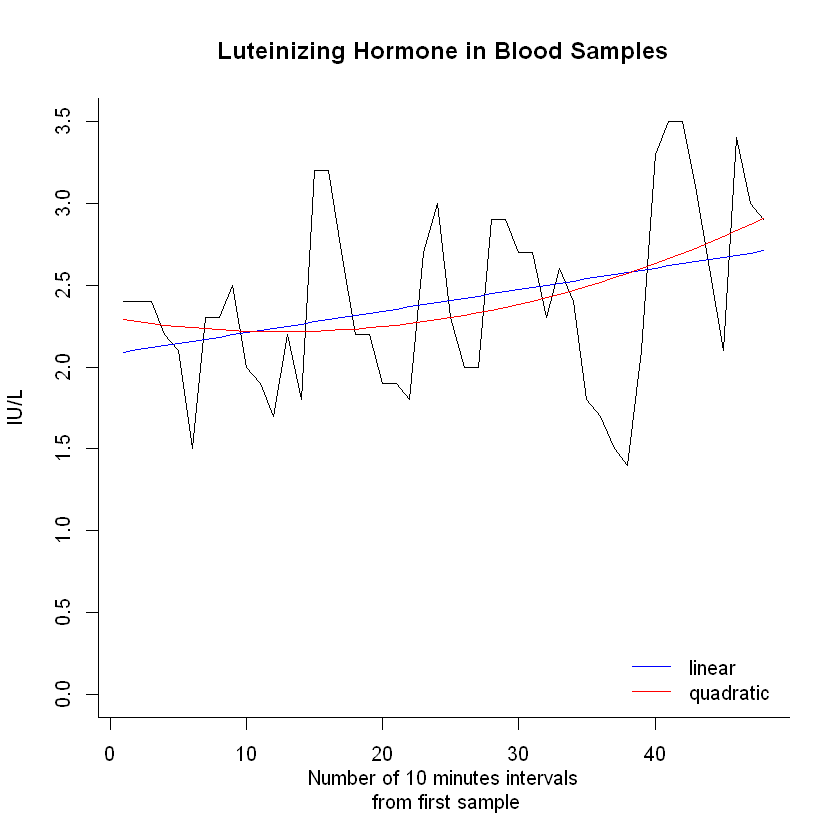

In [44]:
plot(lh, main = "Luteinizing Hormone in Blood Samples", ylab = "IU/L", xlab = "Number of 10 minutes intervals\n from first sample", bty = "l", ylim = c(0, 3.5))
lines(fitted(lm(lh ~ c(1:48))), col = "blue")
lines(fitted(lm(lh ~ poly(1:48, 2))), col = "red")
legend(x = "bottomright", legend = c("linear", "quadratic"), col = c(4, 2), lty = c(1, 1), bty = "n")

## Beaver temperature exercise

In [48]:
# Load the MASS dataset
library(MASS)

In [50]:
data(beav2)

In [55]:
summary(beav2)

      day             time           temp           activ     
 Min.   :307.0   Min.   :   0   Min.   :36.58   Min.   :0.00  
 1st Qu.:307.0   1st Qu.:1128   1st Qu.:37.15   1st Qu.:0.00  
 Median :307.0   Median :1535   Median :37.73   Median :1.00  
 Mean   :307.1   Mean   :1446   Mean   :37.60   Mean   :0.62  
 3rd Qu.:307.0   3rd Qu.:1942   3rd Qu.:37.98   3rd Qu.:1.00  
 Max.   :308.0   Max.   :2350   Max.   :38.35   Max.   :1.00  

In [56]:
head(beav2)

day,time,temp,activ
307,930,36.58,0
307,940,36.73,0
307,950,36.93,0
307,1000,37.15,0
307,1010,37.23,0
307,1020,37.24,0


In [57]:
tail(beav2)

,day,time,temp,activ
95,308,110,37.76,1
96,308,120,37.73,1
97,308,130,37.77,1
98,308,140,38.01,1
99,308,150,38.04,1
100,308,200,38.07,1


In [58]:
class(beav2)

[1] "data.frame"

In [64]:
beav2_ts <- ts(data = beav2[3], start = 1, frequency = 1)

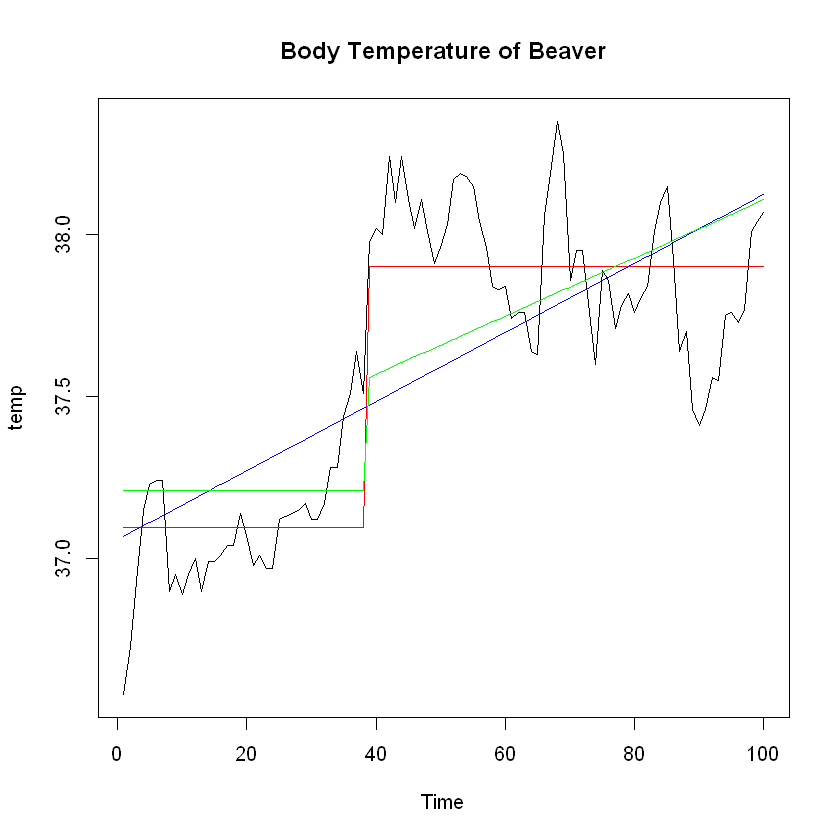

In [88]:
plot(beav2_ts,  main = "Body Temperature of Beaver")
beav_model_1 <- lm(beav2_ts ~ as.factor(beav2$activ))
beav_model_2 <- lm(beav2_ts ~ c(1:100))
beav_model_3 <- lm(beav2_ts ~ c(1:100):(beav2$activ))
lines(fitted(beav_model_1), col = "red")
lines(fitted(beav_model_2), col = "blue")
lines(fitted(beav_model_3), col = "green")

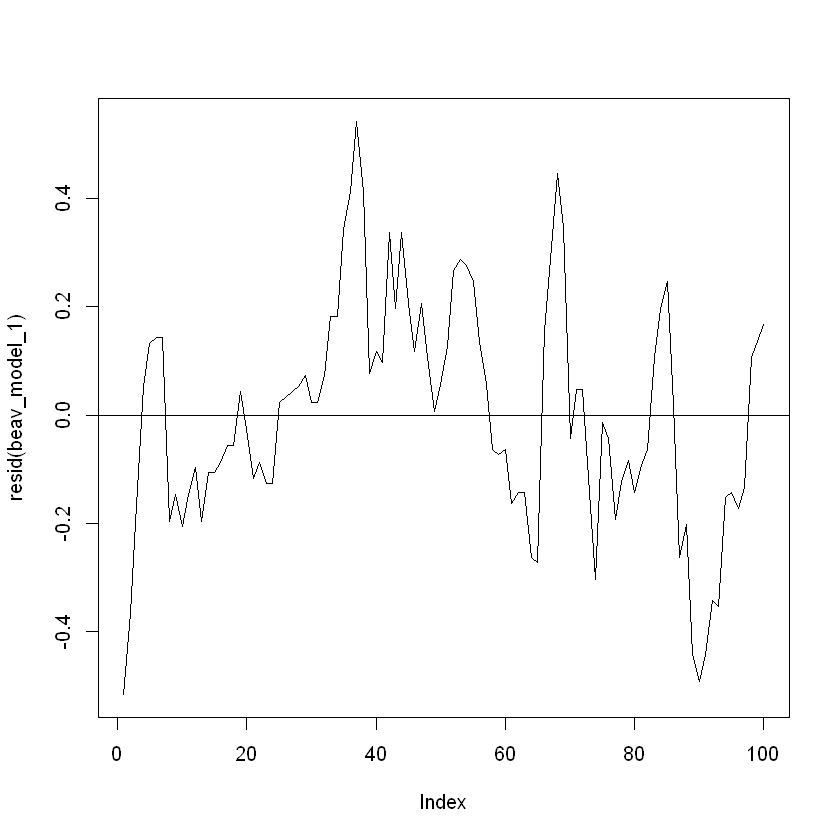

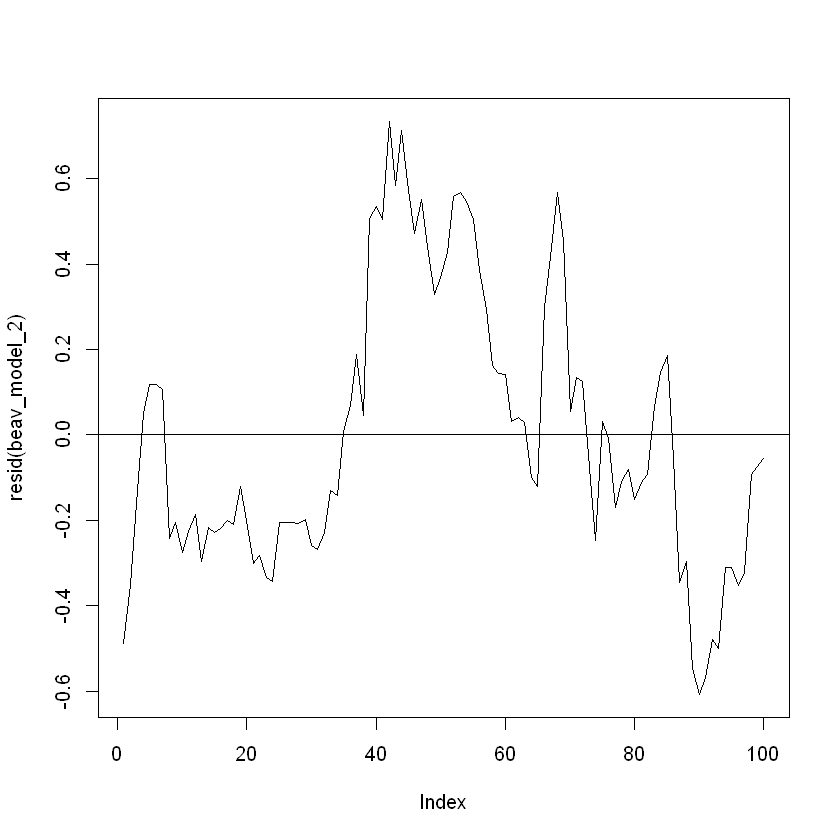

In [95]:
plot(resid(beav_model_1), type = 'l')
abline(h = 0)
plot(resid(beav_model_2), type = 'l')
abline(h = 0)

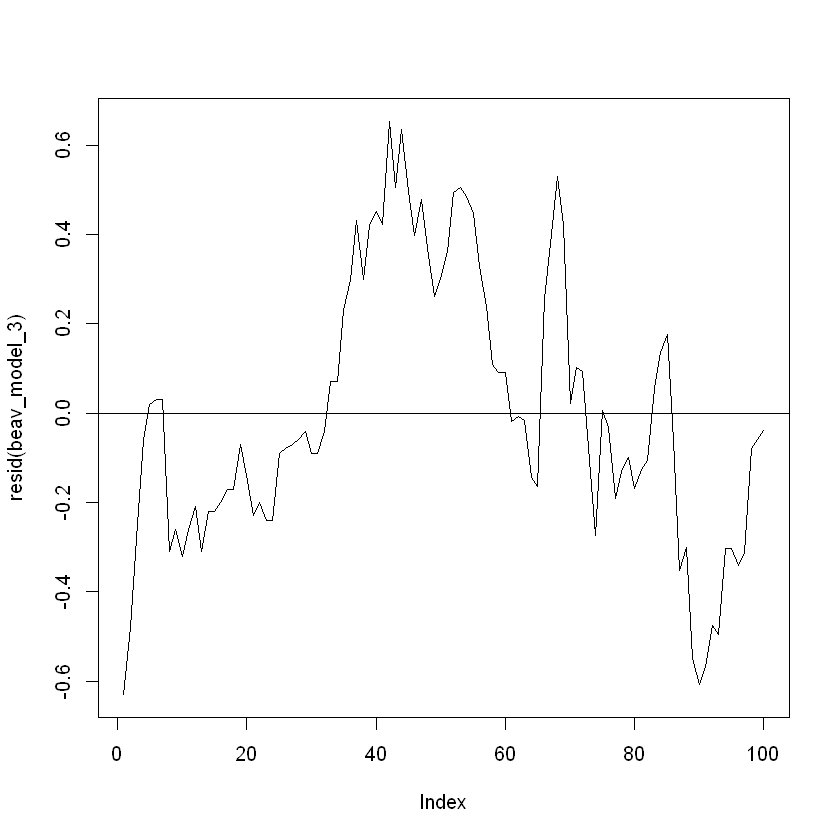

In [96]:
plot(resid(beav_model_3), type = 'l')
abline(h = 0)

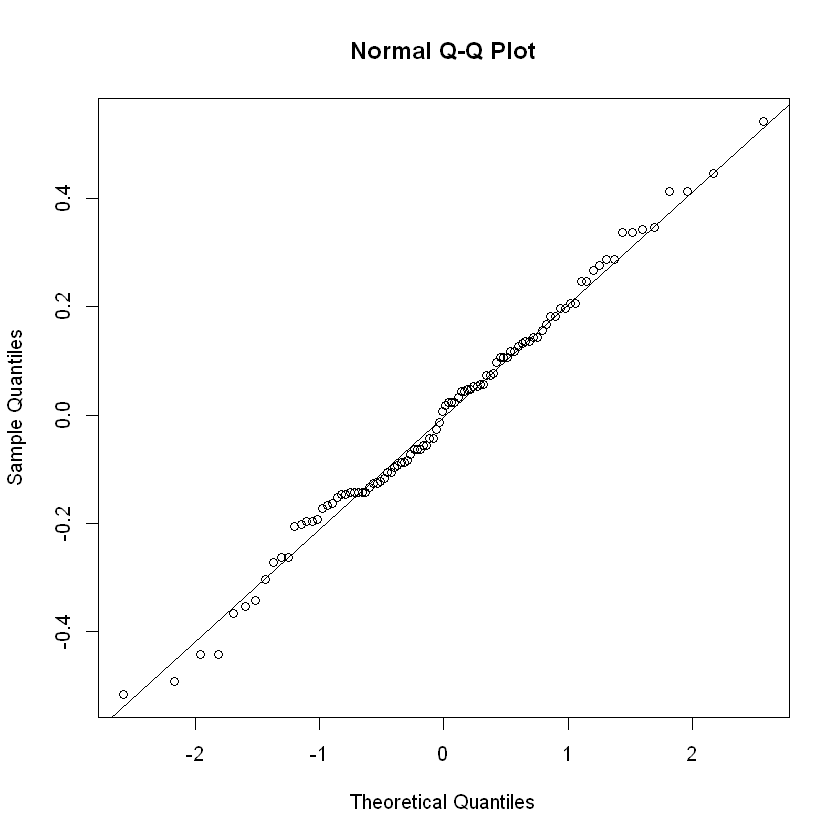

In [91]:
qqnorm(resid(beav_model_1))
qqline(resid(beav_model_1))

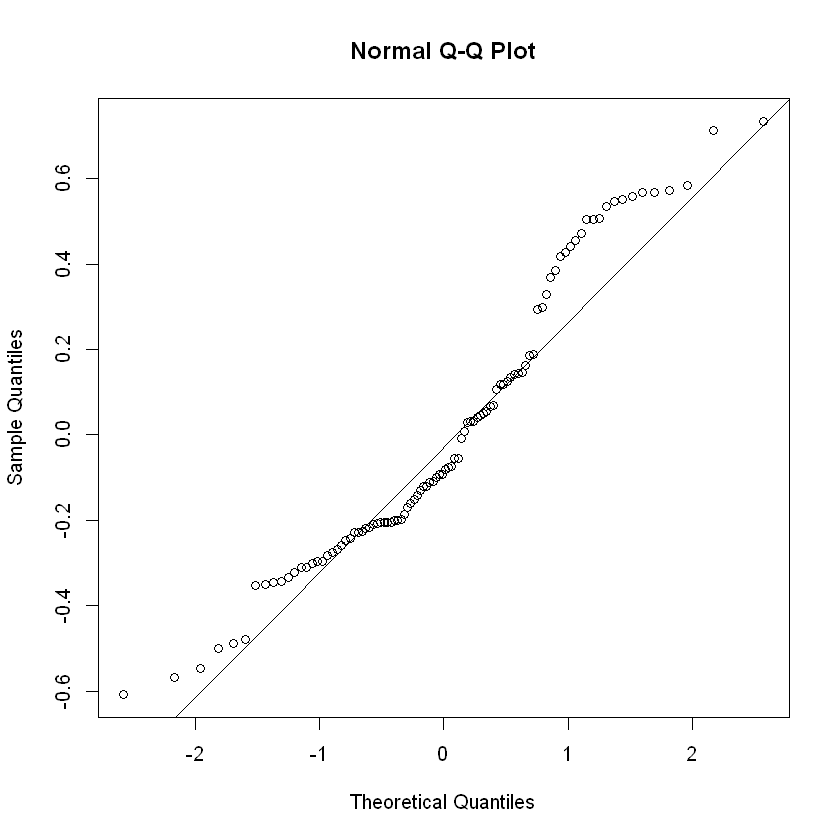

In [92]:
qqnorm(resid(beav_model_2))
qqline(resid(beav_model_2))

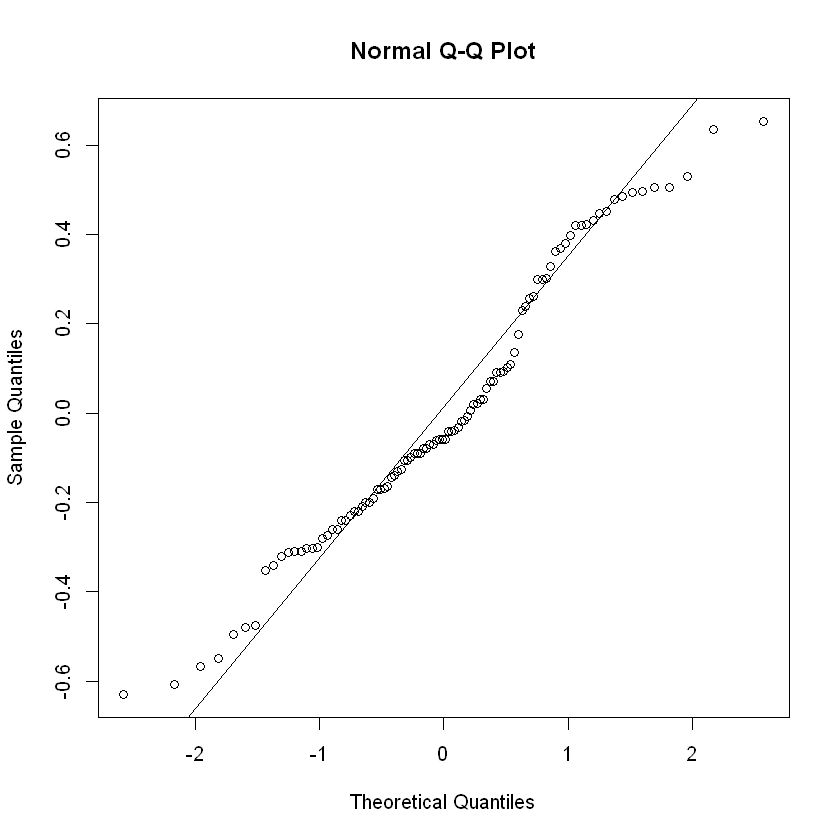

In [93]:
qqnorm(resid(beav_model_3))
qqline(resid(beav_model_3))

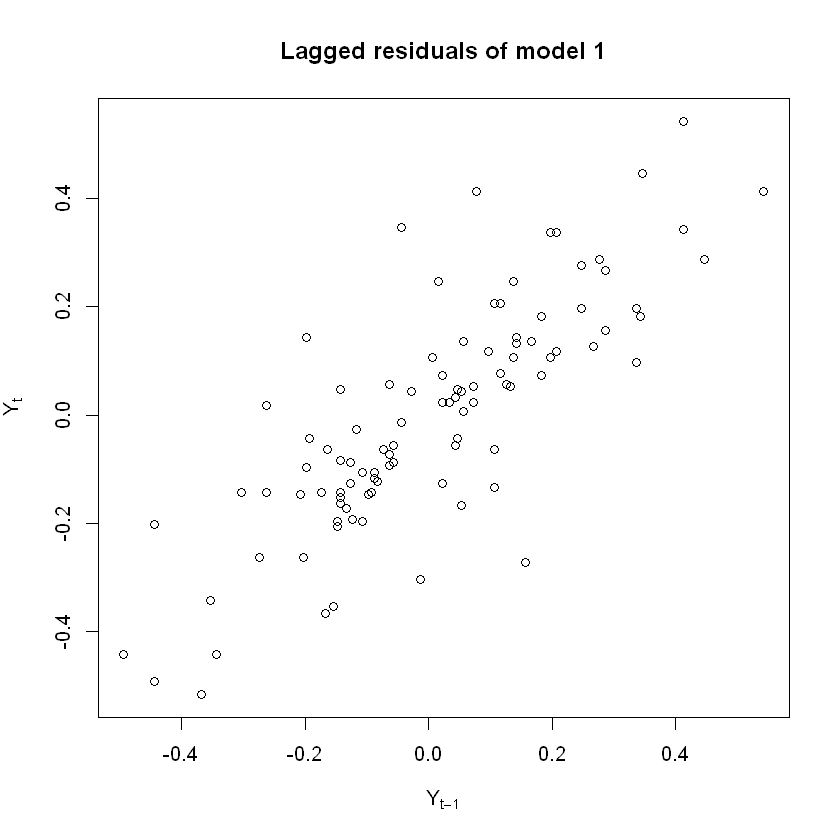

In [114]:
res <- resid(beav_model_1)
plot(res[2:length(res)], res[1:length(res)-1], main = "Lagged residuals of model 1", xlab = expression(Y[t - 1]), ylab = expression(Y[t]),)

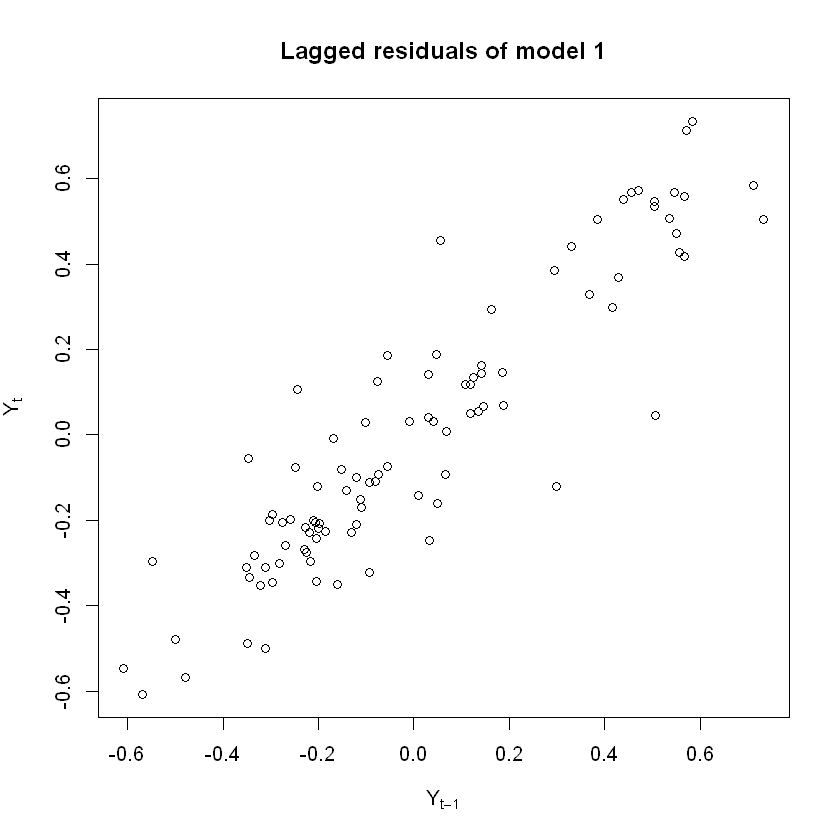

In [115]:
res <- resid(beav_model_2)
plot(res[2:length(res)], res[1:length(res)-1], main = "Lagged residuals of model 1", xlab = expression(Y[t - 1]), ylab = expression(Y[t]),)

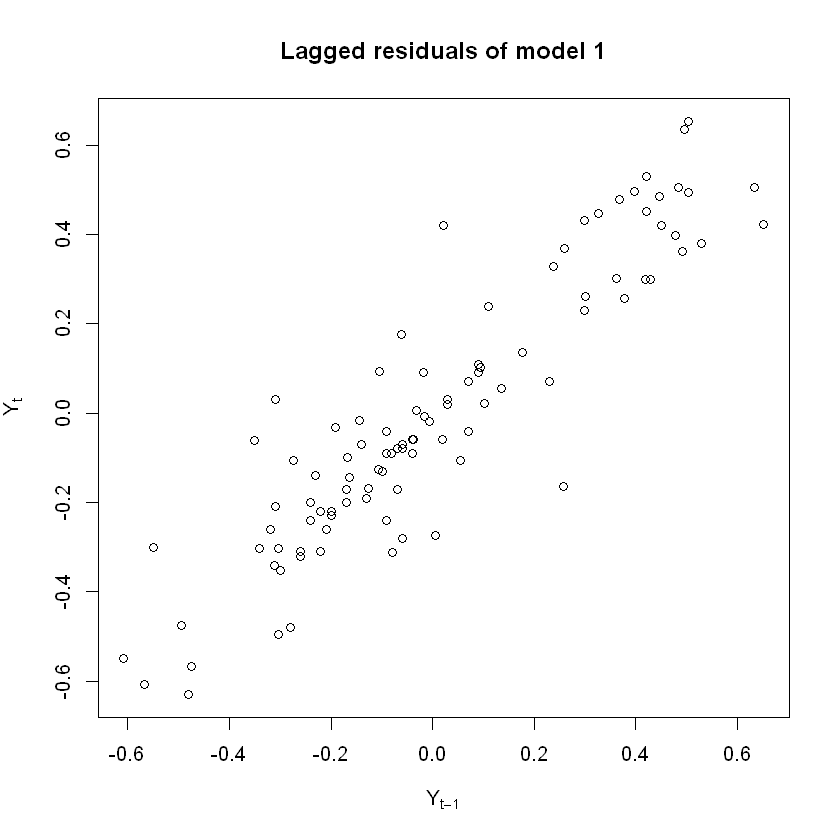

In [116]:
res <- resid(beav_model_3)
plot(res[2:length(res)], res[1:length(res)-1], main = "Lagged residuals of model 1", xlab = expression(Y[t - 1]), ylab = expression(Y[t]),)